ST002200_RPpos_17min_B3_ppm5_3422144 is choosen because its total features, good features and 13/12C pairs are close to the median.


Here re-draw the figure 1c for manuscript **Mar17, 2025**

In [1]:
import sys
import numpy as np
sys.path.insert(0, '../..')
from mining import read_features_from_asari_table
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [3]:
dataset = 'ST002200_RPpos_17min_B3_ppm5_3422144'
study_df = pd.read_csv(f'../../input_data_orbi/{dataset}/full_feature_table.tsv', sep='\t')

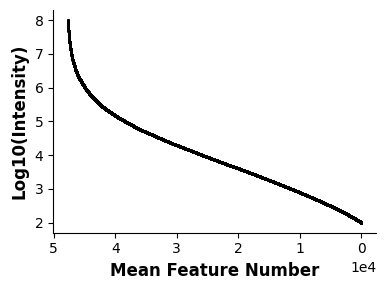

In [4]:
mean_intensities = np.array(study_df.iloc[:, 11:].mean(axis=1))
mean_intensities = mean_intensities[(mean_intensities < 1E8) & (mean_intensities > 1E2)]
mean_intensities.sort()

x1, x2, x3 = np.quantile(mean_intensities, 0.75), np.quantile(mean_intensities, 0.5), np.quantile(mean_intensities, 0.25)
features = list(range(1, len(mean_intensities) + 1))

# Create the scatter plot
plt.figure(figsize=(4, 3))
plt.scatter(
    features, np.log10(mean_intensities),  
    alpha=0.7, color="black", s=1, 
)

# Add labels and title
plt.xlabel("Mean Feature Number", fontsize=12, weight='bold')
plt.ylabel("Log10(Intensity)", fontsize=12, weight='bold')
# plt.title("Number of Features vs Intensity", fontsize=14, weight='bold')

# Customize the axes
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
# Adjust layout
plt.tight_layout()
plt.gca().invert_xaxis()

# Show or save the plot
plt.savefig('fig1c_1.pdf')

In [9]:
orbi_datasets = [x.rstrip() for x in open('selected_45_orbi_datasets.txt').readlines()]
perc = []
for od in orbi_datasets:
    study_df = pd.read_csv(f'../../input_data_orbi/{od}/full_feature_table.tsv', sep='\t')
    mean_intensities = np.array(study_df.iloc[:, 11:].mean(axis=1))
    perc.append(len(mean_intensities[mean_intensities > 1E6]) / len(mean_intensities[mean_intensities > 1E2]))

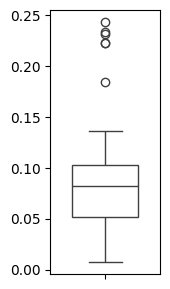

In [10]:
_d = {
    '': perc,
}
from matplotlib.ticker import FormatStrFormatter

# print(np.median(mean_intensities), np.median(unique_empCpds))

fig, ax = plt.subplots(1, 1, figsize=(1.8, 3))
boxplot = sns.boxplot(data=_d, width=0.6)
for i, patch in enumerate(boxplot.patches):
    patch.set_facecolor('white')  # Remove fill color

ax.tick_params(axis='x', rotation=315)
plt.tight_layout()
plt.savefig('fig1c_2.pdf')

In [11]:
np.mean(perc)

0.0922971858818197